In [2]:
import numpy as np 
import pandas as pd 
!pip install kmodes

In [3]:
data=pd.read_csv("/kaggle/input/grocery-product-prices-for-australian-states/Australia_Grocery_2022Sep.csv")
data.drop(["Postal_code","RunDate","Product_Url","tid","state","index"], axis=1,inplace=True)

In [4]:
df=data.dropna()
df=df.reset_index(drop=True)
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE


# K-modes

In [5]:
from kmodes.kprototypes import KPrototypes
categorical_features_idx = [0,1,2,3,5,6,9,11,12,14,15]
data=data.dropna()
data=data.reset_index(drop=True)
mark_array=data.values

In [6]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=10).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 3663, ncost: 576419.2333147321
Run: 1, iteration: 2/10, moves: 1284, ncost: 484994.1540905497
Run: 1, iteration: 3/10, moves: 683, ncost: 468180.26782799116
Run: 1, iteration: 4/10, moves: 584, ncost: 463626.4970581617
Run: 1, iteration: 5/10, moves: 503, ncost: 461828.7787885154
Run: 1, iteration: 6/10, moves: 323, ncost: 460856.9084710519
Run: 1, iteration: 7/10, moves: 416, ncost: 453305.9530925312
Run: 1, iteration: 8/10, moves: 753, ncost: 441793.46655538765
Run: 1, iteration: 9/10, moves: 423, ncost: 436988.60663957126
Run: 1, iteration: 10/10, moves: 284, ncost: 434064.1669445321
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 2638, ncost: 472496.9999211291
Run: 2, iteration: 2/10, moves: 821, ncost: 443127.19140647945
Run: 2, iter

In [7]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['17.5466105263158' '0.24421052631578946' '0.6378947368421053'
  '22.478778947368465' '6.546084210526299' 'Drinks' 'Soft drinks'
  'Soft drink cans' 'Free Range Pork Leg Roast Boneless' '$3.20 per 1L'
  '1kg' 'False' 'Coles' '2741871P' '1L' 'ILPARPA']
 ['4.252382711488761' '0.01791651274473587' '0.5700036941263391'
  '5.637210934614033' '3.031699298116016' 'Pantry'
  'Chips, crackers & snacks' 'Muesli bars & fruit snacks'
  'Chilli Potato Chips' '$1.43 per 100G' '500g' 'False' 'Coles'
  '2670060P' '100G' 'SWAN HILL']
 ['8.587742857142866' '0.10285714285714286' '0.7571428571428571'
  '10.136542857142793' '33.95468571428574' 'Meat & seafood' 'Cheese'
  'Nuts & trail mix' 'Natural Sliced Almonds' '$40.00 per 1Kg' '200g'
  'False' 'Coles' '5645739P' '1Kg' 'DEVONPORT']
 ['9.206593406593388' '0.01098901098901099' '0.8571428571428571'
  '10.532637362637356' '84.5802197802199' 'Meat & seafood' 'Seafood'
  'Prepacked seafood' 'Tasmanian Smoked Salmon With A Hint Of Lemon'
  '$96.00 per 1Kg' '1

In [8]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
data['cluster'] = list(clusters)
data.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city,cluster
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE,1
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE,0


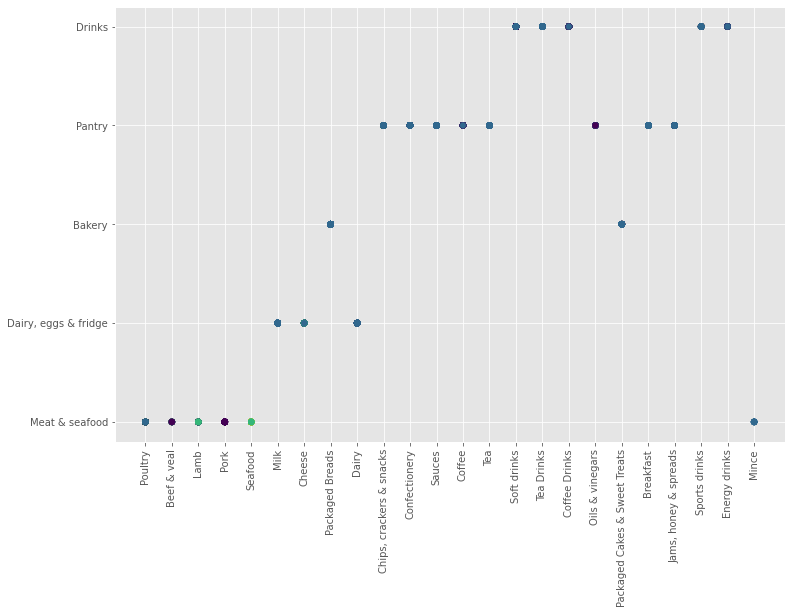

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(data.loc[:, "Sub_category"], data.loc[:,"Category"], c=clusters)
plt.xticks(rotation=90)
plt.show()

In [10]:
data.columns

Index(['Category', 'Sub_category', 'Product_Group', 'Product_Name',
       'Package_price', 'Price_per_unit', 'package_size', 'is_estimated',
       'is_special', 'in_stock', 'Retail_price', 'Brand', 'Sku', 'unit_price',
       'unit_price_unit', 'city', 'cluster'],
      dtype='object')

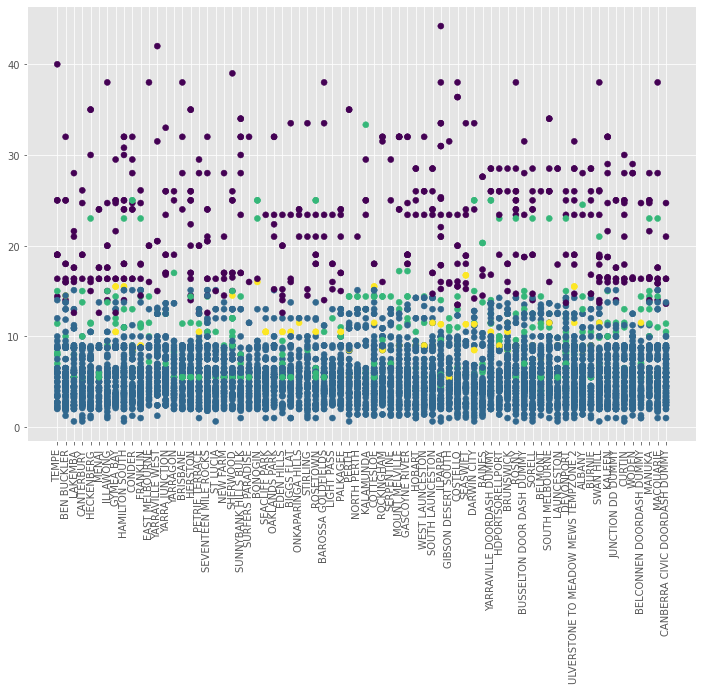

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(data.loc[:, "city"], data.loc[:,"Retail_price"], c=clusters)
plt.xticks(rotation=90)
plt.show()

****

In [12]:
!pip install prince

In [20]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df)
tips_mca = mca.transform(df)
tips_mca.head()

,0,1
0,0.504410,-0.090031
1,0.347847,-0.046580
2,0.346073,-0.045663
3,0.831763,-0.014896
4,0.416507,-0.043450


In [22]:
mca.explained_inertia_

[0.0015952984497622758, 0.0013930352833159375]

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (0.16% inertia)', ylabel='Component 1 (0.14% inertia)'>

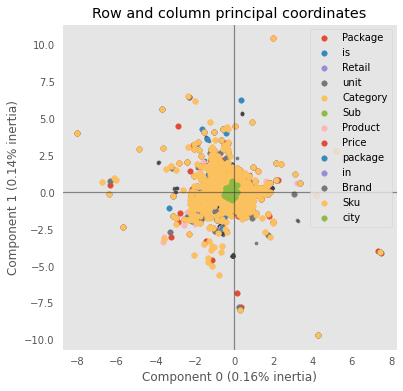

In [21]:
mca.plot_coordinates(X = df)

****

In [23]:
from prince import FAMD
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)
famd.fit(df)
famd.transform(df)

,0,1
0,1.164465,0.830753
1,4.774626,0.977358
2,4.766207,0.972380
3,3.980618,2.499967
4,4.007092,1.032228
...,...,...
6325,2.291180,-1.600166
6326,0.897670,-0.686805
6327,-0.627258,0.423973
6328,-0.629821,0.426082


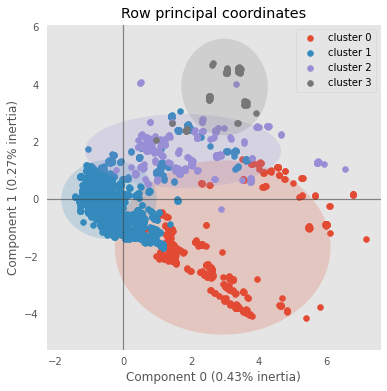

In [26]:
ax = famd.plot_row_coordinates(df,color_labels=['cluster {}'.format(t) for t in data['cluster']] )

In [27]:
famd.partial_row_coordinates(df)

Categorical              Numerical          
                0            1         0         1
0     8508.020388  7281.900909  0.195520 -0.088692
1     8258.855344  6496.838438  5.170003 -0.065506
2     8214.235854  6478.532394  5.170003 -0.065506
3     8781.832199  7010.335569  4.104355  1.889566
4     8519.657736  6355.460346  3.948868  0.494992
...           ...          ...       ...       ...
6325  2116.871758 -4354.467446  2.748138 -1.417878
6326  2122.342743 -4430.096436  0.959172 -0.545805
6327  1384.716903 -3667.111719 -0.844348  0.554117
6328  1386.988237 -3669.463704 -0.844348  0.554117
6329  1339.261013 -4156.007520 -0.575336 -0.458548

[6330 rows x 4 columns]

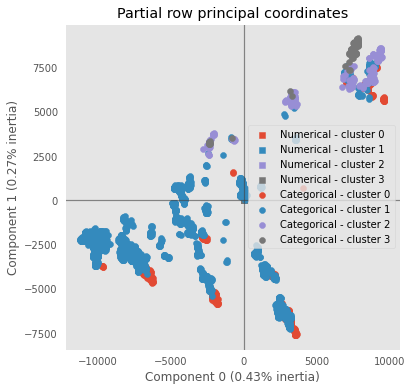

In [30]:
ax = famd.plot_partial_row_coordinates(df, color_labels=['cluster {}'.format(t) for t in data['cluster']])

****

![](https://miro.medium.com/max/828/1*WhKA9Jboj_1sHa0MbWQQ7w.webp)